In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('C:/Users/acer/Downloads/Alt04 -Adidas US Sales Datasets.xlsx', sheet_name = 'Data Sales Adidas')

In [4]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
df.shape

(9648, 13)

The data has 9648 rows and 13 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


**No null values
Data types - datetime64(1), float64(4), int64(2), object(6)**

In [7]:
#Dropping column - Retailer ID
cols = ['Retailer ID']
df = df.drop(cols, axis = 1)

In [8]:
df.head(10)

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,Foot Locker,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,Foot Locker,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet


In [9]:
#Separating numerical and categorical variables
df_numerical_features = df.select_dtypes(include='number')
df_categorical_features = df.select_dtypes(include='object')

In [10]:
df_numerical_features.head()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,50.0,1200,600000.0,300000.0,0.50
1,50.0,1000,500000.0,150000.0,0.30
2,40.0,1000,400000.0,140000.0,0.35
3,45.0,850,382500.0,133875.0,0.35
4,60.0,900,540000.0,162000.0,0.30


In [11]:
df_numerical_features.corr()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Price per Unit,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,0.394546,0.892379,0.956307,1.000000,-0.211920
Operating Margin,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


<AxesSubplot:>

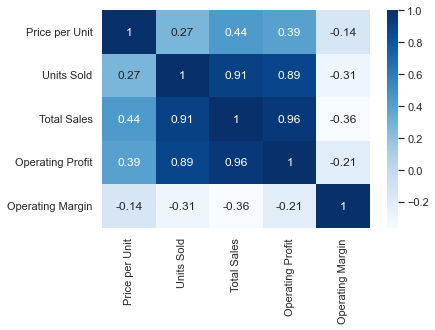

In [12]:
sns.heatmap(df_numerical_features.corr(),annot = True, cmap = 'Blues')

In [13]:
df_categorical_features.head()

,Retailer,Region,State,City,Product,Sales Method
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,In-store
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,In-store
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,In-store
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,In-store
4,Foot Locker,Northeast,New York,New York,Men's Apparel,In-store


**Preprocessing**

StandardScaler, MinMaxScaler

In [14]:
from sklearn import preprocessing

Using StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
stdscaler = StandardScaler()

In [17]:
stdscaleddata = pd.DataFrame(stdscaler.fit_transform(df_numerical_features), columns = stdscaler.feature_names_in_)
stdscaleddata.head(5)

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,0.325297,4.401913,3.570794,4.900780,0.792333
1,0.325297,3.468385,2.866115,2.132757,-1.265442
2,-0.354761,3.468385,2.161437,1.948222,-0.750998
3,-0.014732,2.768238,2.038118,1.835195,-0.750998
4,1.005355,3.001621,3.147987,2.354199,-1.265442


#Using MinMaxScaler

In [18]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

In [19]:
norm = scaler.fit_transform(df_numerical_features)

In [20]:
norm_df = pd.DataFrame(norm,columns = [df_numerical_features.columns])

In [21]:
print('Original Data \n',df_numerical_features.head(10))

Original Data 
    Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0              0.50
1            50.0        1000     500000.0          150000.0              0.30
2            40.0        1000     400000.0          140000.0              0.35
3            45.0         850     382500.0          133875.0              0.35
4            60.0         900     540000.0          162000.0              0.30
5            50.0        1000     500000.0          125000.0              0.25
6            50.0        1250     625000.0          312500.0              0.50
7            50.0         900     450000.0          135000.0              0.30
8            40.0         950     380000.0          133000.0              0.35
9            45.0         825     371250.0          129937.5              0.35


In [22]:
print('Normalized Data by MinMaxScaler() \n',norm_df.head(10))

Normalized Data by MinMaxScaler() 
   Price per Unit Units Sold Total Sales Operating Profit Operating Margin
0       0.417476   0.941176    0.727273         0.769231         0.571429
1       0.417476   0.784314    0.606061         0.384615         0.285714
2       0.320388   0.784314    0.484848         0.358974         0.357143
3       0.368932   0.666667    0.463636         0.343269         0.357143
4       0.514563   0.705882    0.654545         0.415385         0.285714
5       0.417476   0.784314    0.606061         0.320513         0.214286
6       0.417476   0.980392    0.757576         0.801282         0.571429
7       0.417476   0.705882    0.545455         0.346154         0.285714
8       0.320388   0.745098    0.460606         0.341026         0.357143
9       0.368932   0.647059    0.450000         0.333173         0.357143


**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN’s two parameters:

-Minimum samples (“MinPts”): the fewest number of points required to form a cluster - 2*number of dimensions

-ε (epsilon or “eps”): the maximum distance two points can be from one another while still belonging to the same cluster 

for optimal eps - k-nearest neighbor (kNN) distances

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
X_train = stdscaleddata

In [27]:
from sklearn.neighbors import NearestNeighbors

In [28]:
#NearestNeighbors function requires n_neighbors = minpts value

nbrs = NearestNeighbors(n_neighbors = 6).fit(X_train)

#Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_train)

#sort the neighbor distancess (lengths to points) in ascending order
#axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

<function matplotlib.pyplot.show(close=None, block=None)>

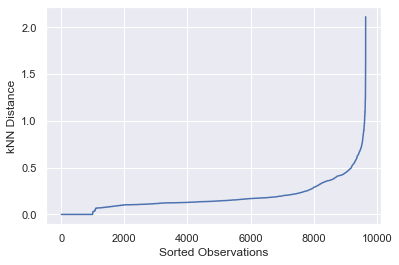

In [30]:
k_dist = sort_neigh_dist[:,5]
plt.plot(k_dist)
plt.ylabel("kNN Distance")
plt.xlabel("Sorted Observations")
plt.show

In [65]:
!pip install --upgrade kneed

In [31]:
from kneed import KneeLocator

In [38]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S=1.0, curve = 'concave', direction = 'increasing', online = True)

#get the estimate of knee point
print(kneedle.knee_y)

1.2428695753029213


<function matplotlib.pyplot.show(close=None, block=None)>

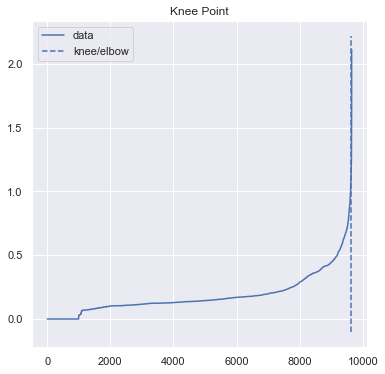

In [39]:
kneedle.plot_knee()
plt.show

In [84]:
clustering = DBSCAN(eps=0.55, min_samples=6).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [85]:
DBSCAN_dataset

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Cluster
0,0.325297,4.401913,3.570794,4.900780,0.792333,-1
1,0.325297,3.468385,2.866115,2.132757,-1.265442,0
2,-0.354761,3.468385,2.161437,1.948222,-0.750998,0
3,-0.014732,2.768238,2.038118,1.835195,-0.750998,0
4,1.005355,3.001621,3.147987,2.354199,-1.265442,0
...,...,...,...,...,...,...
9643,0.325297,-0.900528,-0.634728,-0.618731,-1.471219,0
9644,-0.286755,-0.709155,-0.626942,-0.609844,-1.059664,0
9645,-0.286755,-0.340411,-0.604117,-0.583757,-0.545221,0
9646,-0.218749,-0.872523,-0.636560,-0.612479,-0.030777,0


In [86]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,9356
-1,204
4,24
3,18
8,9
2,8
1,7
5,7
7,6
6,5


<AxesSubplot:xlabel='Operating Margin', ylabel='Total Sales'>

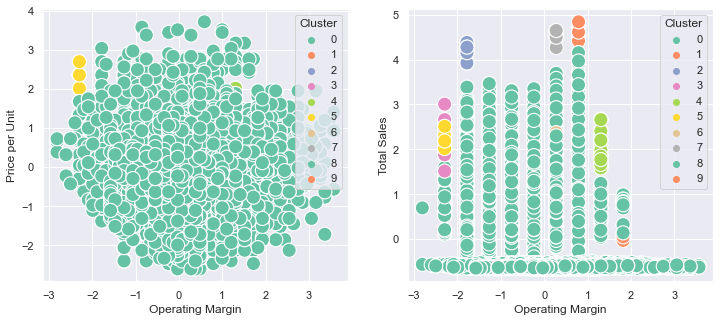

In [93]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Operating Margin', 'Price per Unit', data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1], hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot('Operating Margin', 'Total Sales', data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1], hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)


<AxesSubplot:xlabel='Price per Unit', ylabel='Total Sales'>

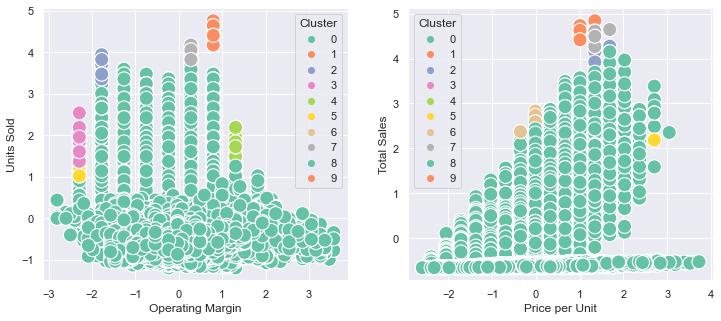

In [95]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Operating Margin', 'Units Sold', data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1], hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot('Price per Unit', 'Total Sales', data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1], hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)



<AxesSubplot:xlabel='Price per Unit', ylabel='Operating Profit'>

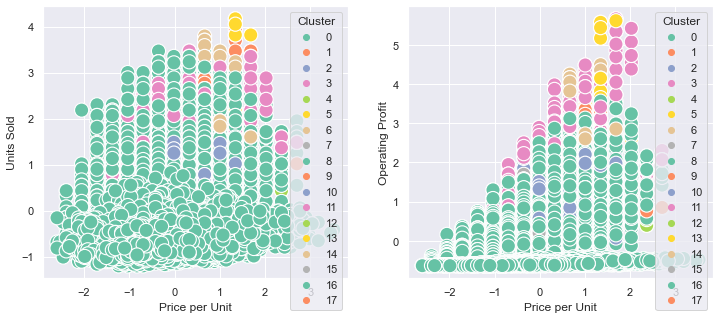

In [55]:
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Price per Unit', 'Units Sold', data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1], hue='Cluster', 
                ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot('Price per Unit', 'Operating Profit', data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],
                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)